# Classification

In this exercise, you'll be working with the MNIST digits recognition dataset, which has 10 classes,
the digits 0 through 9! A reduced version of the MNIST dataset is one of scikit-learn's included
datasets, and that is the one we will use in this exercise. <br/><br/>
Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel
is represented by an integer in the range 0 to 16, indicating varying levels of black.

In [1]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np

# Create feature and target arrays
x = digits.data
y = digits.target

# Split into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

---

## 1. k-Nearest Neighbors

In [3]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.9777777777777777

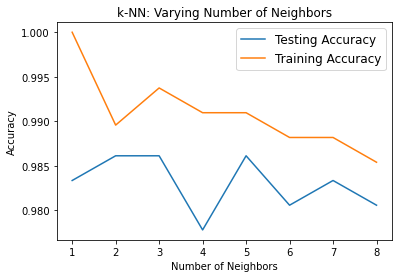

In [4]:
no_neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(x_train,y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(x_test, y_test)

# Visualization of k values vs accuracy
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.rc('legend', fontsize=12)
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

---

## 2. Support Vector Machine

#### Implement SVM classifier for MNIST dataset.

In [5]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)
svc.score(x_test,y_test)

0.9833333333333333

#### Compute and compare the accuracy scores for at least 3 different kernels by using metrics.classification_report.

In [6]:
# create a classification report by using classification_report() function

from sklearn.metrics import classification_report

y_pred_svc = svc.predict(x_test)
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.93      1.00      0.96        40
           2       0.97      1.00      0.98        28
           3       1.00      0.97      0.99        38
           4       1.00      1.00      1.00        33
           5       1.00      0.94      0.97        35
           6       1.00      0.97      0.99        34
           7       1.00      1.00      1.00        37
           8       1.00      0.95      0.97        40
           9       0.95      1.00      0.98        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



#### Make conclusion about which kernel should be used in this case.

---

## 3. Naïve Bayes

#### Compute the accuracy scores and plot the confusion matrix of the same dataset using Naïve Bayes classifier. <br/>  Hint: from sklearn.metrics import confusion_matrix

Accuracy: 0.8666666666666667
F1 Score: 0.8662715986020072


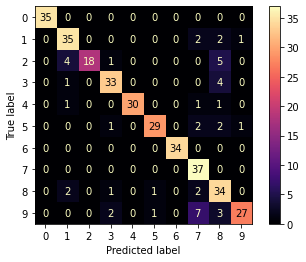

In [7]:
# Model Building and Training
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(x_train, y_train)

# Model Evaluation
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred_nb = model.predict(x_test)

accuray = accuracy_score(y_pred_nb, y_test)
f1 = f1_score(y_pred_nb, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

cm_nb = confusion_matrix(y_test, y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp.plot(cmap='magma');

#### Compare the accuracy of different classifiers in the same plot.

[0.8666666666666667, 0.9805555555555555, 0.9833333333333333]


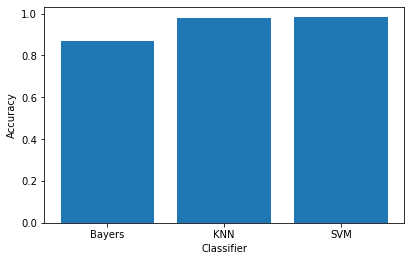

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
Classifier = ['Bayers', 'KNN', 'SVM']
y_pred_knn = knn.predict(x_test)
Accuracy = [accuracy_score(y_pred_nb, y_test), accuracy_score(y_pred_knn, y_test), 
            accuracy_score(y_pred_svc, y_test)]
print(Accuracy)

fig, axes = plt.subplots(figsize=(5,3))
axes = fig.add_axes([0,0,1,1])
axes.bar(Classifier, Accuracy) 
axes.set_ylabel('Accuracy')
axes.set_xlabel('Classifier')
plt.show()

---

# II. Regression

## 1. Linear Regression

In [9]:
import pandas as pd
import matplotlib.pyplot as plt 

#Load gapminder
gapminder = pd.read_csv('gapminder.csv', sep=',')

gapminder.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


#### Use seaborn to visualize the data of Gapminder

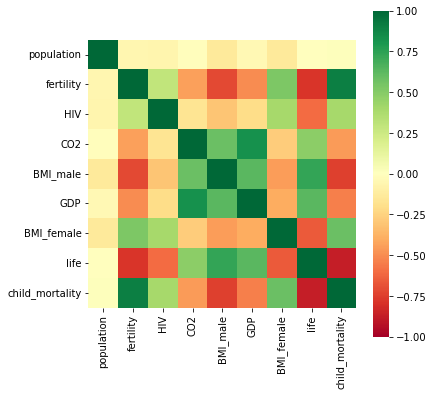

In [10]:
# Correlation Heatmap
plt.subplots(figsize = (6,6))
sns.heatmap(gapminder.corr(), vmin=-1, vmax=1, cmap='RdYlGn', square= True)
plt.show()

----

#### Apply linear regression with the 'fertility' feature to predict life expectancy

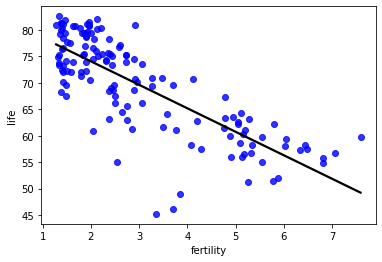

In [11]:
# Load gapminder
gapminder = pd.read_csv('gapminder.csv', sep=',')
gapminder2 = pd.read_csv('gapminder.csv', sep=',')

life = gapminder['life'].values
del gapminder2['life']

X1 = gapminder2['fertility'].values.reshape((-1, 1))
y1 = life 

# Splitting datasets
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.20, random_state=0)

# Training the model
from sklearn.linear_model import LinearRegression

regressor1 = LinearRegression() # instantiate the Linear Regression model
regressor1.fit(X_train1, y_train1) # training the model

import seaborn as sns
sns.regplot(x = "fertility", y = "life", data = gapminder, ci=None,  
            scatter_kws={'color':'blue'}, line_kws={'color':'black'})
plt.show()

#### Apply linear regression with the all features to predict life expectancy. Compare the model score when using all features to one feature in previous step.

In [12]:
# get the coefficients and intercept
print("Coefficients:", regressor1.coef_)
print('Intercept:', regressor1.intercept_)

# expose the model to new values and predict the target vector
y_pred1 = regressor1.predict(X_test1)
print('Predictions:', y_pred1)

# COMPARING TEST DATA AND PREDICTED DATA
comparison_df1 = pd.DataFrame({"Actual":y_test1,"Predicted":y_pred1})
print('Actual test data vs predicted: \n', comparison_df1.to_string(index=False))

# EVALUATING MODEL METRICS
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('MAE:', mean_absolute_error(y_test1,y_pred1))
print("MSE:",mean_squared_error(y_test1,y_pred1))
print("RMSE:",np.sqrt(mean_squared_error(y_test1,y_pred1)))


Coefficients: [-4.40065432]
Intercept: 82.92676506051332
Predictions: [72.45320778 73.59737791 66.64434408 76.72184247 60.70346075 68.58063198
 74.65353494 67.1724226  76.63382939 74.47750877 72.23317507 75.13760692
 52.95830915 60.35140841 70.95698532 72.01314235 72.10115544 59.427271
 72.32118815 76.36979013 74.6095284  60.17538224 73.06929939 61.84763088
 70.07685445 76.63382939 76.67783593 67.52447495]
Actual test data vs predicted: 
  Actual  Predicted
   68.4  72.453208
   80.2  73.597378
   46.1  66.644344
   76.4  76.721842
   62.6  60.703461
   69.4  68.580632
   76.9  74.653535
   64.1  67.172423
   78.5  76.633829
   81.1  74.477509
   75.1  72.233175
   80.3  75.137607
   54.8  52.958309
   55.9  60.351408
   75.2  70.956985
   69.5  72.013142
   68.7  72.101155
   58.3  59.427271
   69.1  72.321188
   67.6  76.369790
   78.7  74.609528
   56.6  60.175382
   75.5  73.069299
   67.4  61.847631
   80.9  70.076854
   73.2  76.633829
   70.1  76.677836
   61.7  67.524475
MAE: 4

#### Apply linear regression with the all features to predict life expectancy

In [13]:
X2 = gapminder2
y2 = fertility 
X2.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,5.2,East Asia & Pacific


In [14]:
# get the list of regions
Regions = gapminder2.groupby('Region').count().index

# creating instance of one-hot-encoder
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

enc_df = pd.DataFrame(enc.fit_transform(X2[['Region']]).toarray())
enc_df.columns = [Regions]

# join 2 dataframe together
X2 = X2.join(enc_df)
X2.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,child_mortality,Region,"(America,)","(East Asia & Pacific,)","(Europe & Central Asia,)","(Middle East & North Africa,)","(South Asia,)","(Sub-Saharan Africa,)"
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,29.5,Middle East & North Africa,0.0,0.0,0.0,1.0,0.0,0.0
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,192.0,Sub-Saharan Africa,0.0,0.0,0.0,0.0,0.0,1.0
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,15.4,America,1.0,0.0,0.0,0.0,0.0,0.0
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,20.0,Europe & Central Asia,0.0,0.0,1.0,0.0,0.0,0.0
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,5.2,East Asia & Pacific,0.0,1.0,0.0,0.0,0.0,0.0


In [15]:
# remove region column
X2 = X2.drop('Region', axis=1)
X2.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,child_mortality,"(America,)","(East Asia & Pacific,)","(Europe & Central Asia,)","(Middle East & North Africa,)","(South Asia,)","(Sub-Saharan Africa,)"
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,29.5,0.0,0.0,0.0,1.0,0.0,0.0
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,192.0,0.0,0.0,0.0,0.0,0.0,1.0
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,15.4,1.0,0.0,0.0,0.0,0.0,0.0
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,20.0,0.0,0.0,1.0,0.0,0.0,0.0
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,5.2,0.0,1.0,0.0,0.0,0.0,0.0


Coefficients:
 [-1.46438009e-09 -7.05651785e-01 -6.03724664e-01 -1.41824324e-01
  5.23723262e-02  1.52881864e-04 -3.04093612e-01 -8.45023004e-02
  8.51138633e-01 -2.46314911e+00  4.56839800e-01  2.04874850e+00
 -1.46064820e+00  5.67070375e-01]
Intercept: 111.81272560463567
Predictions: [79.13046885 56.85787949 53.23115553 63.35663855 64.12579304 79.14422241
 73.71911388 72.37260748 53.49122738 59.83031755 86.89723778 76.00374015
 69.72532522 75.35359852 62.65814449 73.26478967 71.34074491 61.84509831
 71.20635596 86.305573   73.1809885  53.81279126 66.91832974 71.815299
 57.93098832 74.49529773 74.41039214 83.22613273]
Actual test data vs predicted: 
  Actual  Predicted
   81.1  79.130469
   55.8  56.857879
   52.0  53.231156
   67.4  63.356639
   62.7  64.125793
   80.0  79.144222
   70.1  73.719114
   78.2  72.372607
   51.4  53.491227
   63.2  59.830318
   80.4  86.897238
   82.6  76.003740
   68.7  69.725325
   76.0  75.353599
   64.1  62.658144
   74.0  73.264790
   72.5  71.34074

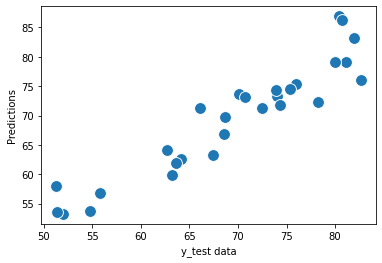

In [16]:
# Splitting data into train and test sets
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2.values, y2, test_size=0.20)

# Fitting the simple linear regression to the Training Set
regressor2 = LinearRegression() # Instatiate LinearREgression object
regressor2.fit(X_train2, y_train2) # fit the model

# Getting the coefficients and the intercept
print("Coefficients:\n", regressor2.coef_)
print('Intercept:', regressor2.intercept_)

# Predicting test results
y_pred2 = regressor2.predict(X_test2)
print('Predictions:', y_pred2)

# Compare the actual values and predicted values
comparison_df2 = pd.DataFrame({"Actual":y_test2,"Predicted":y_pred2}).sort_index()
print('Actual test data vs predicted: \n', comparison_df2.to_string(index=False))

# Checking the residuals:
residuals = y_test2 - y_pred2
print('residuals:', residuals)

# Compare the actual values and predicted values with a scatter plot:
import matplotlib.pyplot as plt
sns.scatterplot(x=y_test2, y = y_pred2, ci=None, s=140)
plt.xlabel('y_test data')
plt.ylabel('Predictions')
plt.show()


In [17]:
# Compare the model score when using all features to one feature in previous step.
r2_score_fertility = r2_score(y_test1,y_pred1)
print('Model score for fertility feature:', r2_score_fertility)

r2_score_all = r2_score(y_test2,y_pred2)
print('Model score for all feature:', r2_score_all)

Model score for fertility feature: 0.55712738611597
Model score for all feature: 0.8823587567296641


#### Apply 5-fold cross-validation (for both 2 above steps) and compare your model score accuracy.  <br/> Hint: from sklearn.model_selection import cross_val_score.

In [18]:
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(regressor1, X1, y1, cv=5)

scores2 = cross_val_score(regressor2, X2.values, y2, cv=5)

print('5-fold cross-validation:\n', 
      'fertility feature:', scores1, '\n', 
      'all feature:', scores2 )

#print('score accuracy:\n', 
#      'fertility feature:', regressor1.score(X_test1, y_test1), '\n', 
#      'all feature:', regressor2.score(X_test2, y_test2) )

print('accuracy:\n', 
      'fertility feature:', scores1.mean(), '\n', 
      'all feature:', scores2.mean())

5-fold cross-validation:
 fertility feature: [0.71001079 0.75007717 0.55271526 0.547501   0.52410561] 
 all feature: [0.8196741  0.80301541 0.89758712 0.80425614 0.94015848]
accuracy:
 fertility feature: 0.6168819644425119 
 all feature: 0.8529382494226448


---

## 2. Logistic Regression

#### Load the ‘creditcard.csv’ file into dataframe. The attribute ‘Class’ is marked for fraud transactions (Class = 1).

In [19]:
import pandas as pd
df = pd.read_csv('creditcard.csv', sep=',')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print(len(frauds), 'frauds, ', len(non_frauds), 'nonfrauds.')

492 frauds,  284315 nonfrauds.


#### Compare the relation between Class and Amount. Conclusion?

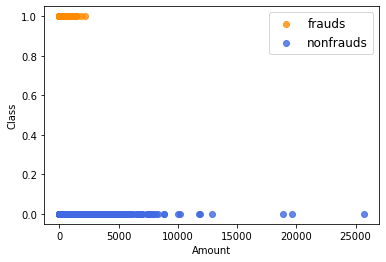

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 4) # set figure length of x, y

sns.regplot(x = "Amount", y = "Class", data = df[df.Class == 1], ci=None,  
            color='darkorange', logistic=True, fit_reg=False)

sns.regplot(x = "Amount", y = "Class", data = df[df.Class == 0], ci=None,  
            color='royalblue', logistic=True, fit_reg=False)

plt.legend(loc='upper right', labels=['frauds', 'nonfrauds'])
plt.show()

__Conclusion:__<br/>
Fraud occurs only for amounts below 5000.

#### Use Logistic Regression to predict the fraud transactions and plot the confusion matrix of the model

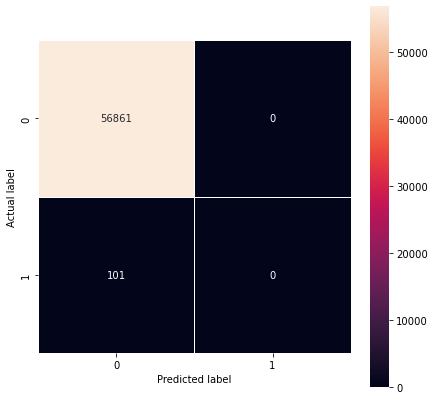

In [22]:
# Splitting Data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['Amount'].values.reshape(-1, 1), 
                                                    df['Class'].values, test_size=0.2, random_state=0)

# Modeling
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

predictions = logisticRegr.predict(x_test)

# Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)

# Confusion Matrix Plot
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

---

# III. Clustering (OPTIONAL)

## Image Compression by K-means clustering

In this exercise, you have to perform an image compression of the given picture of New York (New York.jpeg).

To do so, we want to keep not all the possible colors, but only 4.

Thus, you have to perform a clustering algorithm, with K=4, and show the image with those only 4 colors.

```
🔦 Hint:: An image is composed of pixels. Each pixel is made of 3 channels: Red, Green, Blue (RGB). Those color levels are encoded on 8 bits, meaning they are in the range [0-255]. For example, a pixel with this RGB color : (0, 0, 255) will be a very strong blue pixel.

```

---

#### goldcoast.jpeg

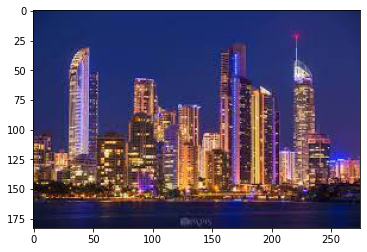

In [23]:
%matplotlib inline
# TODO: Load and review the image
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
image = np.asarray(Image.open('goldcoast.jpeg'))
plt.imshow(image)
plt.show()

In [24]:
# TODO: Reshape the image for k-means clustering
image_reshape = image.reshape(50325, 3)
print("image: {}".format(image.shape))
print("image reshape: {}".format(image_reshape.shape))

image: (183, 275, 3)
image reshape: (50325, 3)


In [25]:
# TODO: Run k-means clustering on reshaped image
from sklearn.cluster import KMeans
modele_km = KMeans(n_clusters=4)
modele_km.fit(image_reshape)

KMeans(n_clusters=4)

In [26]:
# TODO: Print cluster centers and construct compressed image
#pixel_centroids = modele_km.labels_ 
palette = modele_km.cluster_centers_
compressed_image = palette[modele_km.labels_]
print(palette)
print("compressed image: {}".format(compressed_image.shape))

[[ 38.28819347  46.92949825 112.77186358]
 [ 47.62478618  30.89095108  47.90780021]
 [200.12239172 156.36366824 147.90566369]
 [128.98457136  85.59611795  80.88129899]]
compressed image: (50325, 3)


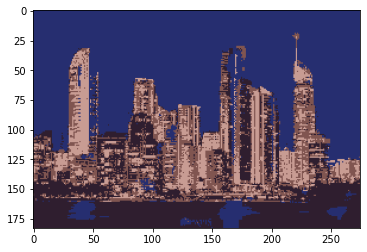

In [27]:
# TODO: Show the compressed image
compressed_image = compressed_image.reshape(image.shape[0],image.shape[1],3)
plt.imshow(compressed_image/255)
plt.show()

---

#### New York (New York.jpeg)

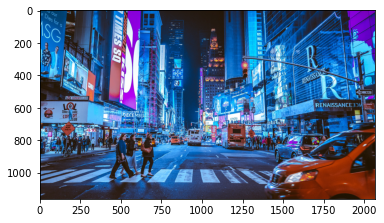

In [28]:
%matplotlib inline
# TODO: Load and review the image
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
image = np.asarray(Image.open('New York.jpeg'))
plt.imshow(image)
plt.show()

In [29]:
# TODO: Reshape the image for k-means clustering
image_reshape = image.reshape(2396304, 3)
print("image: {}".format(image.shape))
print("image reshape: {}".format(image_reshape.shape))

image: (1161, 2064, 3)
image reshape: (2396304, 3)


In [30]:
# TODO: Run k-means clustering on reshaped image
from sklearn.cluster import KMeans
modele_km = KMeans(n_clusters=4)
modele_km.fit(image_reshape)

KMeans(n_clusters=4)

In [31]:
# TODO: Print cluster centers and construct compressed image
#pixel_centroids = modele_km.labels_ 
palette = modele_km.cluster_centers_
compressed_image = palette[modele_km.labels_]
print(palette)
print("compressed image: {}".format(compressed_image.shape))

[[ 39.00227279  63.988599   129.51433799]
 [ 27.67299908 127.43455685 210.0187641 ]
 [147.30999727 190.5828622  230.71838996]
 [ 59.60327963  37.34822158  36.57640832]]
compressed image: (2396304, 3)


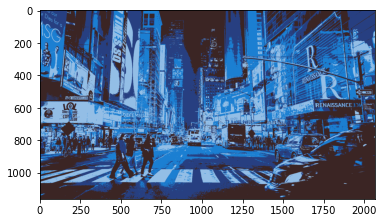

In [32]:
# TODO: Show the compressed image
compressed_image = compressed_image.reshape(image.shape[0],image.shape[1],3)
plt.imshow(compressed_image/255)
plt.show()